In [1]:
import pandas as pd
import requests
from datetime import datetime, date
import os

In [2]:
APIKEY = None
with open('apikey.txt', 'r') as _apikey:
    APIKEY = _apikey.read()
    _apikey.close()

In [3]:
API_URL_PRICE_DAILY = f"https://www.alphavantage.co/query?function=FX_DAILY&from_symbol=EUR&to_symbol=USD&outputsize=full&apikey={APIKEY}"

with requests.Session() as s:
    download = s.get(API_URL_PRICE_DAILY)
    df_price = pd.DataFrame(download.json()['Time Series FX (Daily)']).T
    df_price.columns = [i.split()[1] for i in df_price.columns.values]
    df_price.sort_index(inplace=True)
    
df_price.to_csv(f"data/APLHAVANTAGE_AAPL.csv")
df_price.reset_index(names='date', inplace=True)
df_price['date'] = pd.to_datetime(df_price['date'], format="%Y-%m-%d")

In [4]:
start_date = pd.Timestamp(year=2020, month=1, day=1)
end_date = pd.Timestamp(year=2020, month=12, day=31)

In [5]:
df_one_year = df_price[((df_price['date'] >= start_date) & (df_price['date'] <= end_date))].reset_index(drop=True)
df_one_year

,date,open,high,low,close
0,2020-01-01,1.12123,1.12214,1.12080,1.12145
1,2020-01-02,1.12145,1.12245,1.11620,1.11713
2,2020-01-03,1.11713,1.11800,1.11230,1.11598
3,2020-01-06,1.11596,1.12055,1.11550,1.11955
4,2020-01-07,1.11956,1.11976,1.11320,1.11477
...,...,...,...,...,...
257,2020-12-25,1.21836,1.22050,1.21610,1.21832
258,2020-12-28,1.21832,1.22504,1.21794,1.22160
259,2020-12-29,1.22140,1.22753,1.22057,1.22475
260,2020-12-30,1.22476,1.23101,1.22435,1.22960


In [6]:
dates = df_one_year.date.values
dates_for_news = [str(i).replace('-','')[:9] + '0000' for i in dates]

In [7]:
#https://api.worldnewsapi.com/search-news?api-key=8f3cfceb2aec40b78a9731c4c69bdd0f&text=aapl?latest-publish-date=2020-01-01

In [7]:
APIKEY_NEWS = None
with open('apikey_news.txt', 'r') as _apikey:
    APIKEY_NEWS = _apikey.read()
    _apikey.close()

In [8]:
start = start_date.date().isoformat()
end = end_date.date().isoformat()

In [9]:

#&language=en&earliest-publish-date=2020-01-01&latest-publish-date=2020-02-01$text=aapl
API_URL_NEWS = f"https://api.worldnewsapi.com/search-news?api-key={APIKEY_NEWS}&text=aapl&latest-publish-date=2020-01-01"

In [85]:
def parse_news_data(_urlNews: str):
    with requests.Session() as s:
        download = s.get(_urlNews)
        df_news = pd.json_normalize(download.json()['news'])
    return df_news

In [86]:
df = parse_news_data(API_URL_NEWS)
df

,id,title,text,url,image,publish_date,author,language,source_country,sentiment
0,60404,INTERNET: Grindr Case Bodes Poorly for China T...,Bottom line: The US decision to force a sale o...,http://www.youngchinabiz.com/en/internet-grind...,https://media.gettyimages.com/photos/stop-hand...,2019-05-23 09:58:40,newsdoug,en,cn,0.163


In [111]:
df.to_csv('data/news.csv')

In [93]:
df_one_year.date

0     2020-01-01
1     2020-01-02
2     2020-01-03
3     2020-01-06
4     2020-01-07
         ...    
257   2020-12-25
258   2020-12-28
259   2020-12-29
260   2020-12-30
261   2020-12-31
Name: date, Length: 262, dtype: datetime64[ns]

In [114]:
dates_for_news = ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01',
                  '2020-05-01', '2020-06-01', '2020-07-01', '2020-08-01', 
                  '2020-09-01', '2020-10-01', '2020-11-01', '2020-12-01', '2021-01-01']

pare_dates = [i for i in zip(dates_for_news[:-1], dates_for_news[1:])]

for i, dt in enumerate(pare_dates):
    s = dt[0]
    e = dt[1]
    API_URL_NEWS = f"https://api.worldnewsapi.com/search-news?api-key={APIKEY_NEWS}&language=en&earliest-publish-date={s}&latest-publish-date={e}$number=50$text=aapl"
    
    df = parse_news_data(API_URL_NEWS)
    df.to_csv(f'data/news_{i}')
    

In [138]:
df1 = pd.read_csv('data/news_0').iloc[:,1:].sort_values('publish_date').reset_index(drop=True)
df1 = df1[['title', 'text', 'url', 'publish_date']]

In [139]:
df2 = pd.read_csv('data/news_1').iloc[:,1:].sort_values('publish_date').reset_index(drop=True)
df2 = df2[['title', 'text', 'url', 'publish_date']]

In [141]:
df_all_news = pd.concat([df1, df2], ignore_index=True)

In [149]:
df_all_news = None

for i in range(12):
    path = f"data/news_{i}"
    
    df = pd.read_csv(path).iloc[:,1:].sort_values('publish_date').reset_index(drop=True)
    df = df[['title', 'text', 'url', 'publish_date']]
    
    if i == 0:
        df_all_news = df.copy()
    else:
        df_all_news = pd.concat([df_all_news, df], ignore_index=True)

df_all_news

,title,text,url,publish_date
0,Making History With the Ethiopian Diaspora Tru...,Originally published at AlMariam.com WISHING A...,http://cyberethiopia.com/2013/?p=2161,2020-01-02 09:55:40
1,Tourism in Spain: Spaniards’ new travel trends...,Spaniards traveled less in the summer of 2019 ...,https://english.elpais.com/elpais/2019/12/30/i...,2020-01-02 10:31:00
2,New draft GB 7718 – main changes – The CHINA F...,2019 ended with a “roar” from the food regulat...,https://chinafoodlaw.blog/2020/01/03/new-draft...,2020-01-03 05:28:40
3,"Amelga, LLC announces letter released by Ermya...",FOR IMMEDIATE RELEASE Contact AmelgaLLC@gmail....,http://cyberethiopia.com/2013/?p=2165,2020-01-05 16:41:22
4,Spanish airports: Airport authority plans €1.5...,The Spanish airport authority Aena is planning...,https://english.elpais.com/elpais/2020/01/03/i...,2020-01-07 07:54:47
...,...,...,...,...
112,Arts Council invests €7 million in 530 artists...,More than 530 artists across 27 counties and o...,https://www.artscouncil.ie/News/Arts-Council-i...,2020-12-08 00:00:00
113,Arts Council research: more people ready to go...,More people in Ireland are ready to go to thea...,https://www.artscouncil.ie/News/Arts-Council-r...,2020-12-11 00:00:00
114,Nollaig Casey appointed Traditional Artist in ...,"The Arts Council, in association with, The Col...",https://www.artscouncil.ie/News/Nollaig-Casey-...,2020-12-11 00:00:00
115,Trending on (Addis) Fortune – (Addis) Fortune ...,Ethio Telecom Claims Regional Operations in Me...,https://addisfortune.news/web-stories/trending...,2020-12-11 11:57:16


In [157]:
df_all_news.sort_values('publish_date', ignore_index=True, inplace=True)
df_all_news.to_csv('data/news_total.csv')

In [10]:
def remove_commas(string):
   trans_table = {ord(',') : None, ord(':') : None, ord('.') : None, ord('!') : None,
                  ord('–') : None, ord("'") : None, ord('"') : None, ord('€') : None,
                  ord('£') : None, ord(';') : None, ord('‘') : None, ord('’') : None,
                  ord('(') : None, ord(')') : None, ord('«') : None, ord('[') : None,
                  ord(']') : None, ord('?') : None, ord('+') : None, ord('-') : None,
                  ord('=') : None, ord('_') : None, ord('&') : None, ord('ó') : 'o', ord('ñ') : 'n'}
   
   return string.translate(trans_table)

In [71]:
for i in range(len(df_all_news)):
    news = df_all_news.iloc[i]
    text = news.text
    title = news.title
    date = news.publish_date
    
    f = open(f'data/news_text/{remove_commas(date)}_{remove_commas(title)}', 'w')
    f.write(f'date: {str(date)}\ntitle: {remove_commas(title)}\n{remove_commas(text)}')
    #f.write(remove_commas(text))
    f.close()
    

NameError: name 'df_all_news' is not defined

In [72]:
for i in range(5):
    f = open(f'text_{i}', 'w')
    f.write(f'test_{i}')
    f.close()

In [12]:
df_news = pd.read_csv('data/news_total.csv').iloc[:,1:]
df_news

,title,text,url,publish_date
0,Making History With the Ethiopian Diaspora Tru...,Originally published at AlMariam.com WISHING A...,http://cyberethiopia.com/2013/?p=2161,2020-01-02 09:55:40
1,Tourism in Spain: Spaniards’ new travel trends...,Spaniards traveled less in the summer of 2019 ...,https://english.elpais.com/elpais/2019/12/30/i...,2020-01-02 10:31:00
2,New draft GB 7718 – main changes – The CHINA F...,2019 ended with a “roar” from the food regulat...,https://chinafoodlaw.blog/2020/01/03/new-draft...,2020-01-03 05:28:40
3,"Amelga, LLC announces letter released by Ermya...",FOR IMMEDIATE RELEASE Contact AmelgaLLC@gmail....,http://cyberethiopia.com/2013/?p=2165,2020-01-05 16:41:22
4,Spanish airports: Airport authority plans €1.5...,The Spanish airport authority Aena is planning...,https://english.elpais.com/elpais/2020/01/03/i...,2020-01-07 07:54:47
...,...,...,...,...
112,Arts Council invests €7 million in 530 artists...,More than 530 artists across 27 counties and o...,https://www.artscouncil.ie/News/Arts-Council-i...,2020-12-08 00:00:00
113,Arts Council research: more people ready to go...,More people in Ireland are ready to go to thea...,https://www.artscouncil.ie/News/Arts-Council-r...,2020-12-11 00:00:00
114,Nollaig Casey appointed Traditional Artist in ...,"The Arts Council, in association with, The Col...",https://www.artscouncil.ie/News/Nollaig-Casey-...,2020-12-11 00:00:00
115,Trending on (Addis) Fortune – (Addis) Fortune ...,Ethio Telecom Claims Regional Operations in Me...,https://addisfortune.news/web-stories/trending...,2020-12-11 11:57:16


In [13]:
df_news.iloc[0]

title           Making History With the Ethiopian Diaspora Tru...
text            Originally published at AlMariam.com WISHING A...
url                         http://cyberethiopia.com/2013/?p=2161
publish_date                                  2020-01-02 09:55:40
Name: 0, dtype: object

In [14]:
df_news.publish_date = df_news.publish_date.apply(lambda x: remove_commas(x))
df_news.title = df_news.title.apply(lambda x: remove_commas(x))
df_news.text = df_news.text.apply(lambda x: remove_commas(x))

In [15]:
for i in range(df_news.shape[0]):
    news = df_news.iloc[i]
    text = news.text
    title = news.title
    date = news.publish_date
    
    #print(f'{i}\n{date}\n{title}\n{text}')
    
    f = open(f'data/news_text/{date}_{title[:25]}', 'w', encoding='utf-8')
    f.write(f'date: {date}\ntitle: {title}\n{text}')
    f.close()

In [23]:
df_one_year[['date', 'close']]

,date,close
0,2020-01-01,1.12145
1,2020-01-02,1.11713
2,2020-01-03,1.11598
3,2020-01-06,1.11955
4,2020-01-07,1.11477
...,...,...
257,2020-12-25,1.21832
258,2020-12-28,1.22160
259,2020-12-29,1.22475
260,2020-12-30,1.22960


In [24]:
import matplotlib.pyplot as plt

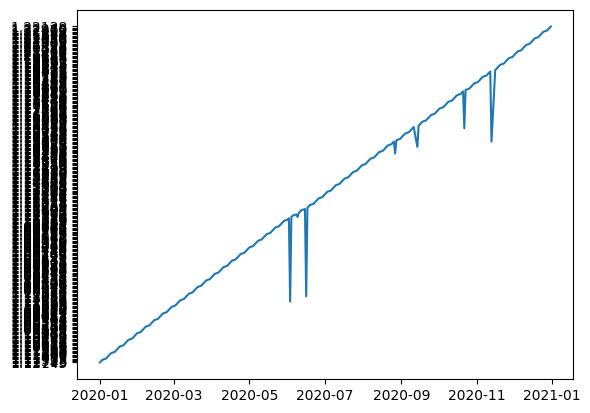

In [28]:
plt.figure()
plt.plot(df_one_year.date, df_one_year.close)
plt.show()

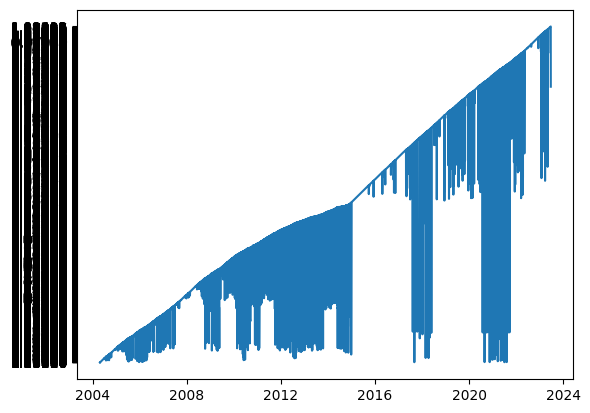

: 

In [34]:
plt.figure()
plt.plot(df_price.date, df_price.close)
plt.show()